### VGG16

In [13]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=( 150, 150, 3))

Using TensorFlow backend.


### FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:\\Ryerson Courses\\MRP Project\\Kaggle Diabetic Retinopathy data\\train data\\train_all'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


In [15]:
def extract_features(directory, sample_count):
 features = np.zeros(shape=(sample_count, 4, 4, 512))
 labels = np.zeros(shape=(sample_count , 5))
 generator = datagen.flow_from_directory(
   directory,
   target_size=(150, 150 ),
   batch_size=batch_size,
   class_mode='categorical')
 i = 0
 for inputs_batch, labels_batch in generator:
   features_batch = conv_base.predict(inputs_batch)
   features[i * batch_size : (i + 1) * batch_size] = features_batch
   labels[i * batch_size : (i + 1) * batch_size] = labels_batch
   i += 1
   if i * batch_size >= sample_count:
     break
 return features, labels


In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_features, train_labels = extract_features(train_dir, 17562)
validation_features, validation_labels = extract_features(validation_dir, 8780)
test_features, test_labels = extract_features(test_dir, 8774)

#--- 22h 35min 

Found 17562 images belonging to 5 classes.
Found 8780 images belonging to 5 classes.
Found 8774 images belonging to 5 classes.


In [21]:

train_features = np.reshape(train_features, (17562, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (8780, 4 * 4 * 512))
test_features = np.reshape(test_features, (8774, 4 * 4 * 512))

In [23]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='categorical_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
epochs=40,
batch_size=20,
validation_data=(validation_features, validation_labels))


Train on 17562 samples, validate on 8780 samples
Epoch 1/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.9177 - acc: 0.7280 - val_loss: 0.8579 - val_acc: 0.7349
Epoch 2/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.8783 - acc: 0.7348 - val_loss: 0.8580 - val_acc: 0.7349
Epoch 3/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.8749 - acc: 0.7348 - val_loss: 0.8553 - val_acc: 0.7349
Epoch 4/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.8688 - acc: 0.7348 - val_loss: 0.8582 - val_acc: 0.7349
Epoch 5/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.8636 - acc: 0.7348 - val_loss: 0.8570 - val_acc: 0.7349
Epoch 6/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.8625 - acc: 0.7348 - val_loss: 0.8650 - val_acc: 0.7349
Epoch 7/40
17562/17562 [==============================] - 21s 1ms/step - loss: 0.8623 - acc: 0.7348 - val_loss: 0.8598 - val_acc:

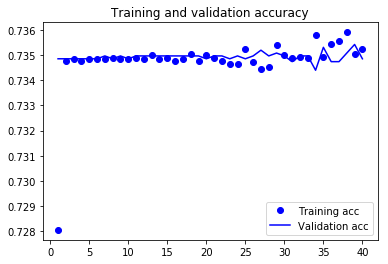

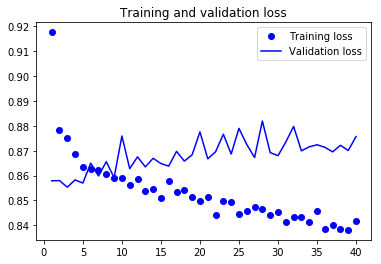

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### FEATURE EXTRACTION WITH DATA AUGMENTATION

In [26]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [27]:

import datetime 
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

datetime.datetime.now()
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

datetime.datetime.now()
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')

datetime.datetime.now()
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')

datetime.datetime.now()
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])


datetime.datetime.now()
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=5)

datetime.datetime.now()

Found 17562 images belonging to 5 classes.
Found 8780 images belonging to 5 classes.
Epoch 1/10
10/10 [==============================] - 48s 5s/step - loss: 0.9849 - acc: 0.7350 - val_loss: 0.8000 - val_acc: 0.7400
Epoch 2/10
10/10 [==============================] - 30s 3s/step - loss: 0.8360 - acc: 0.7550 - val_loss: 0.7630 - val_acc: 0.7400
Epoch 3/10
10/10 [==============================] - 31s 3s/step - loss: 0.9369 - acc: 0.7200 - val_loss: 0.7863 - val_acc: 0.7400
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 0.8352 - acc: 0.7350 - val_loss: 0.8242 - val_acc: 0.7400
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 0.9536 - acc: 0.7050 - val_loss: 0.7822 - val_acc: 0.7400
Epoch 6/10
10/10 [==============================] - 31s 3s/step - loss: 0.7686 - acc: 0.7750 - val_loss: 0.8224 - val_acc: 0.7400
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.9146 - acc: 0.7200 - val_loss: 0.8039 - val_acc: 0.7400
Epoch

datetime.datetime(2018, 7, 19, 1, 24, 3, 668582)

### DenseNet121

In [29]:
from keras.applications import DenseNet121
conv_base = DenseNet121(weights='imagenet',
include_top=False,
input_shape=( 221, 221, 3))

In [30]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:\\Ryerson Courses\\MRP Project\\Kaggle Diabetic Retinopathy data\\train data\\train_all'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


In [33]:
def extract_features(directory, sample_count):
 features = np.zeros(shape=(sample_count, 7, 7, 1024))
 labels = np.zeros(shape=(sample_count , 5))
 generator = datagen.flow_from_directory(
   directory,
   target_size=(221, 221 ),
   batch_size=batch_size,
   class_mode='categorical')
 i = 0
 for inputs_batch, labels_batch in generator:
   features_batch = conv_base.predict(inputs_batch)
   features[i * batch_size : (i + 1) * batch_size] = features_batch
   labels[i * batch_size : (i + 1) * batch_size] = labels_batch
   i += 1
   if i * batch_size >= sample_count:
     break
 return features, labels

In [34]:
print("Before train_features step" , datetime.datetime.now())
train_features, train_labels = extract_features(train_dir, 17562)

print("Before validation_features step" , datetime.datetime.now())
validation_features, validation_labels = extract_features(validation_dir, 8780)

print("Before test_features step" , datetime.datetime.now())
test_features, test_labels = extract_features(test_dir, 8774)
print("End test_features step" , datetime.datetime.now())

Before train_features step 2018-07-19 01:33:03.507606
Found 17562 images belonging to 5 classes.
Before validation_features step 2018-07-19 02:26:32.956868
Found 8780 images belonging to 5 classes.
Before test_features step 2018-07-19 02:53:51.775509
Found 8774 images belonging to 5 classes.
End test_features step 2018-07-19 03:21:32.126513


In [35]:

train_features = np.reshape(train_features, (17562, 7 * 7 * 1024))
validation_features = np.reshape(validation_features, (8780, 7 * 7 * 1024))
test_features = np.reshape(test_features, (8774, 7 * 7 *  1024))

In [37]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='categorical_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
epochs=100,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 17562 samples, validate on 8780 samples
Epoch 1/100
17562/17562 [==============================] - 114s 7ms/step - loss: 0.9450 - acc: 0.7192 - val_loss: 1.0388 - val_acc: 0.7350
Epoch 2/100
17562/17562 [==============================] - 110s 6ms/step - loss: 0.8635 - acc: 0.7323 - val_loss: 0.8835 - val_acc: 0.7353
Epoch 3/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.8412 - acc: 0.7347 - val_loss: 0.8333 - val_acc: 0.7378
Epoch 4/100
17562/17562 [==============================] - 110s 6ms/step - loss: 0.8146 - acc: 0.7359 - val_loss: 0.8180 - val_acc: 0.7367
Epoch 5/100
17562/17562 [==============================] - 111s 6ms/step - loss: 0.8046 - acc: 0.7389 - val_loss: 0.8758 - val_acc: 0.7386
Epoch 6/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.7896 - acc: 0.7403 - val_loss: 0.8835 - val_acc: 0.7382
Epoch 7/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.7759 - acc: 0.7459 - val_loss: 0.8

C:\Users\beqaj\Anaconda2\envs\keras\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215620). Check your callbacks.
  % delta_t_median)


17562/17562 [==============================] - 153s 9ms/step - loss: 0.3188 - acc: 0.8830 - val_loss: 1.4807 - val_acc: 0.7272
Epoch 61/100
17562/17562 [==============================] - 108s 6ms/step - loss: 0.3164 - acc: 0.8844 - val_loss: 1.3259 - val_acc: 0.6933
Epoch 62/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.3120 - acc: 0.8833 - val_loss: 1.4244 - val_acc: 0.6890
Epoch 63/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.3075 - acc: 0.8845 - val_loss: 1.4765 - val_acc: 0.7280
Epoch 64/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.2976 - acc: 0.8883 - val_loss: 1.4052 - val_acc: 0.7091
Epoch 65/100
17562/17562 [==============================] - 109s 6ms/step - loss: 0.2931 - acc: 0.8936 - val_loss: 1.4946 - val_acc: 0.7260
Epoch 66/100
17562/17562 [==============================] - 108s 6ms/step - loss: 0.2943 - acc: 0.8895 - val_loss: 1.4763 - val_acc: 0.7229
Epoch 67/100
17562/17562 [=======

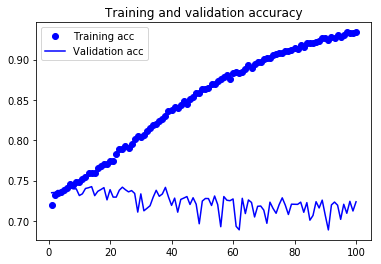

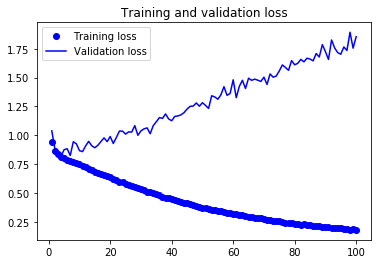

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()